# Vorbereitung  
--------------------------------

## Spektrometrische Messverfahren für $\alpha$-Strahlen  

__Ionisationskammer__: Gasvolumen zwischen zwei Elektroden einer Spannung $U$. Ist $U$ ausreichend hoch, gelangen alle entstehenden Ionen zu den Elektroden und tragen zum Messstrom bei. In diesem Bereich hängt der Messtrom nurnoch von der Größe des Gasvolumens und der Probe selbst ab.  
__Halbleiterzähler__: Spezielle, niedrig dotierte Diode. Ionisierende Teilchen (hier $\alpha$) erzeugen am pn-Übergang Elektron-Loch-Paare die im Feld des pn-Übergangs getrennt und über seitliche Elektroden abfließen. Diese Ladungsträger wiederum erzeugen an einem Widerstand einen messbaren Spannungsabfall der proportional zum Ionisationsvermögen und damit der Energie der Strahlung ist.  

## Oberflächensperrschichtdetektoren  
Basierend auf dem Prinzip der _Schottky_-Diode. Eine Metall-Halbleiterdiode wird in Sperrrichtung mit einer Gleichspannung Betrieben. Bei Ionisation an der Grenzschicht entstehen bewegliche Ladungsträger die als Strompuls messbar sind. Vorteil ist durch ihre geringe Dicke/Baugröße eine gute Messbarkeit von $\alpha$-Strahlung (geringe Eindringtiefe).

## Radium 226, Radium Folgeprodukte  
$$
\begin{align*}
    ^{226}_{80}\text{Ra} &\longrightarrow ^{222}_{86}\text{Rn} + \alpha (+ \gamma_{186 keV}) \\
    ^{222}_{86}\text{Rn} &\longrightarrow ^{218}_{84}\text{Po} + \alpha \\
    ^{218}_{84}\text{Po} &\longrightarrow ^{214}_{82}\text{Pb} + \alpha \\
    ^{214}_{82}\text{Pb} &\longrightarrow ^{214}_{83}\text{Bi} + \beta^- (+\gamma_{352, 295, 242, 53 keV} \\
    ^{214}_{83}\text{Bi} &\longrightarrow ^{214}_{84}\text{Po} + \beta^- (+\gamma_{609 keV} \\
    ...
\end{align*}
$$

## Zerfallsgesetz, Erweitertes Zerfallsgesetz  
$$
\begin{equation*}
	N(t) = N_0 \cdot e^{-\frac{t}{\tau}}
\end{equation*}
$$

## Vielkanalimpulshöhenanalysator, ADC  
Impulse werden anhand ihrer Amplitude und Pulsrate klassifiziert. Im internen **A**nalog-**D**igital-**C**onverter werden die Impulse - nach dem sie z.B. in einem Halbleiterdetektor ausgelöst und von einem Vorverstärker verstärkt wurden - nach ihrer Amplitude digitalisiert und an nachgeordnete Auswerteelektronik weiter gereicht.

## Entstehung des Impulshöhenspektrums, Energiekalibrierung  
Werden die Impulse nach Anzahl in der Veretikalen und Amplitude in der Horizontalen aufgetragen wird das entstehende Histogram Impulshöhenspektrum genannt. Es ist anzunehmen, dass die Impulshöhenverteilung bei einer bestimmten Strahlenquelle um eine definierte Energie normalverteilt ist. Mit einem bekannten Strahler wird zur Energiekalibrierung die Glocke entsprechend horizontal verschoben.

## Zerfall von Am-241, $\alpha$-Energien  
$T_{1/2} = 432,2 a$  
$$
\begin{equation*}
	^{241}_{95}\text{Am} \longrightarrow ^{237}_{93}\text{Np} + \alpha + \gamma_{59,5409 keV}
\end{equation*}
$$
Zu erwartende $\alpha$-Energien: $5,486 \text{MeV}$ (85%), $5,443 \text{MeV}$ (13%) und $5,388 \text{MeV}$ (2%).

## Reichweite von $\alpha$-Teilchen, Vorabsorption  
![alt text](referenzen/a-reichweite.jpg "Reichweite von $\alpha$-Teilchen durch Materie")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  
_Bragg_-Beziehung.

## Alphaspektrometer (Bedienungsanleitung)

## Nulleffekt  
Zählrate $\neq 0$ bei Abwesenheit des untersuchten Strahlers.  
Ursächlich sind hier meist natürliche und/oder kosmische Hintergrundstrahlung. Im Falle des Halbleiterdetektors können aber auch Tunneleffekte an der Grenzschicht false-positives erzeugen. Die Nullrate muss im Vorfeld gemessen werden um die Abweichung der eigentlichen Messung zu minimieren.

# Auswertung
-------------------------

## To-do:

- [x] Eichstrahler $^{241}\text{Am}$ mit Vakuum zur Energiekalibrierung verwenden.
  - [ ] Halbwertsbreite (Energieauflösung).
  - [ ] Gesamtimpulsrate
  - [ ] Lage des Maximums (Zuordnung Kanalnummer -> Energie).
- Plot Eichstrahler energiekalibriert:
  - [ ] Eichstrahler ohne Vakuum (Gesamtimpulsrate, Energieauflösung, Lage des Maximums).
  - [ ] Eichstrahler mit Vakuum und Aluminium-Folie (Gesamtimpulsrate, Energieauflösung, Lage des Maximums).
- Teststrahler $^{226}\text{Ra}$ mit Vakuum:
  - [ ] Plot energiekalibriertes Spektrum.
  - [ ] $\alpha$ -Energien ermitteln.
  - [ ] Aktivitäten der gemessenen $\alpha$ -Strahler ermitteln.

## Importe

In [31]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
# import csv
import copy

In [32]:
# Lets create a list of all the data files included in "messdaten/" subdirectory
sample_files = os.listdir("messdaten/")
print(sample_files)

['Am241_first_try_ohne_vac(1).csv', 'Am241_first_try_ohne_vac.csv', 'Am241_mit_vac.csv', 'Am241_mit_vac_Al.csv', 'Leer_ohne_vac.csv', 'Ra226_mit_vac.csv']


In [33]:
# Opening the data iterating over all the files found in the cell above
spl_lst = []
for i,file in enumerate(sample_files):
    with open(("messdaten/" + file), newline='', encoding='utf-8') as path:
        frame = pd.read_csv(path, delimiter=';')
        frame.columns = [col.strip() for col in frame] # stupid whitespaces t(-_-t)
        spl_lst.append(frame)
        del frame

# print(spl_lst[0])
Am_wo_vac1 = spl_lst[0]
Am_wo_vac2 = spl_lst[1]
Am_w_vac = spl_lst[2]
Am_w_vac_w_Al = spl_lst[3]
Empty_wo_vac = spl_lst[4]
Ra_w_vac = spl_lst[5]

## Plots

### Am214 **mit** Vakuum, **ohne** Absorber, unkalibriert

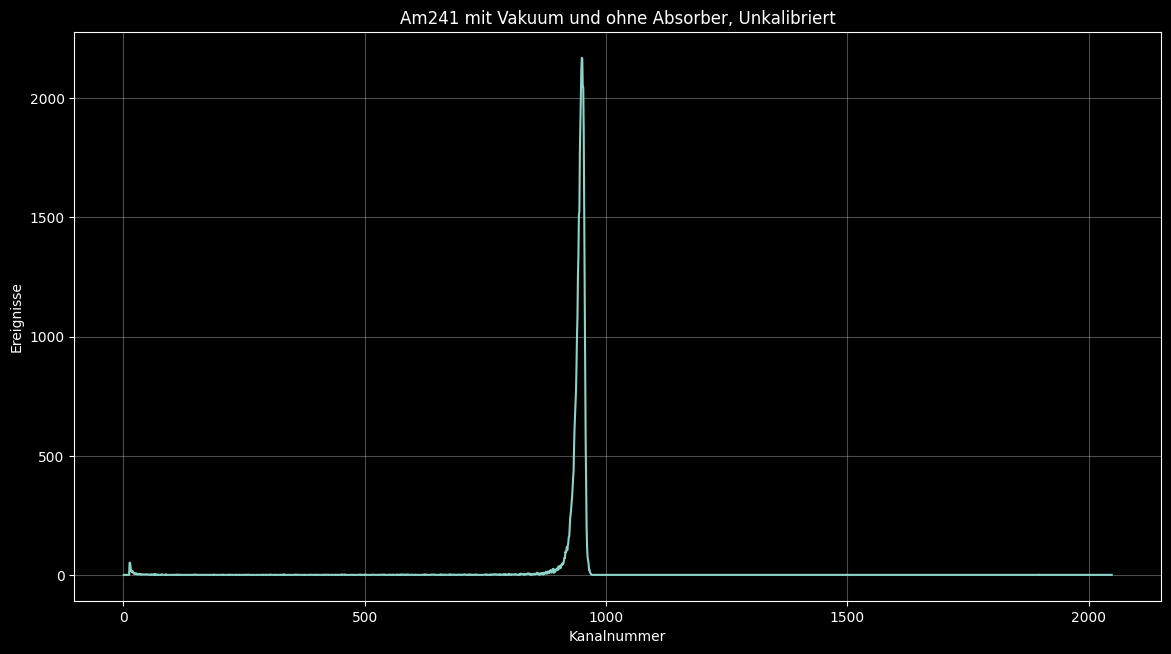

In [34]:
cm = 1/2.54 # inch to cm, metric like brrr

# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(Am_w_vac["Kanal"], Am_w_vac["Impulse"])
# ax.plot(Ra_w_vac["Kanal"], Ra_w_vac["Impulse"] / 100)
ax.set_title("Am241 mit Vakuum und ohne Absorber, Unkalibriert")
ax.set_xlabel("Kanalnummer")
ax.set_ylabel("Ereignisse")
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

### Definition der Funktionen zur Energiekalibrierung

Um die Daten zu kalibrieren, müssen die ``Energie(keV)``-Zeilen so entlang der ``Impulse``-Zeilen verschoben werden, dass der Peak bei der entsprechenden Energie zum liegen kommt.  

Wie gehen wir dabei vor?

1. Peakindex des *Eichstrahlers* $^{241}\text{Am}$ im Vakuum und ohne Absorber suchen.
2. Einen Proportionalitätsfaktor finden, der auf die Energiewerte angewandt den Peak-Index auf $5486$ keV legt.
3. Energiewerte für Linke und Rechts Seite der halben Impulshöhe des Peaks finden.
4. Energieauflösung aus der Differenz finden.

In [35]:
def find_fwmh(array):
	array = np.asarray(array)
	peakidx = array.argmax()
	half_max = array[peakidx] / 2
	left = array[0:peakidx]
	right = array[peakidx:-1]
	idx1 = (np.abs(left - half_max)).argmin()
	idx2 = (np.abs(right - half_max)).argmin() + peakidx
	return idx1, idx2

In [36]:
def EvenBetterEnergyCalib(calib_frame, energy=1):
	# 1.
	peakidx = calib_frame["Impulse"].idxmax()
	# 2.
	coeff = energy / calib_frame["Energie(keV)"][peakidx]
	# 3.
	idx1, idx2 = find_fwmh(calib_frame["Impulse"])
	# 4.
	fwmh = coeff * (calib_frame["Energie(keV)"].iloc[idx2] - calib_frame["Energie(keV)"].iloc[idx1])

	return coeff, fwmh, idx1, idx2

In [37]:
# Debug: delete after
print(EvenBetterEnergyCalib(Am_w_vac, 5486))
print(Am_w_vac["Impulse"].iloc[940])
print(Am_w_vac["Impulse"].iloc[955])

(5.774736842105263, 86.62105263157895, 940, 955)
1080
1194


### Am214 **mit** Vakuum, **ohne** Absorber, kalibriert

Die Quelldaten sollen erstmal unverändert bleiben. Daher wird eine Kopie erstellt und damit weiter gearbeitet.

In [38]:
if "Am_w_vac_mod" in globals():
    del Am_w_vac_mod
Am_w_vac_mod = copy.deepcopy(Am_w_vac)
ecoeff, fwmh, fwmh_left_idx, fwmh_right_idx = EvenBetterEnergyCalib(Am_w_vac, 5486)
Am_w_vac_mod["Energie(keV)"] = ecoeff * Am_w_vac_mod["Energie(keV)"]

In [39]:
print(Am_w_vac["Impulse"].iloc[949] / 2.0)

1085.0


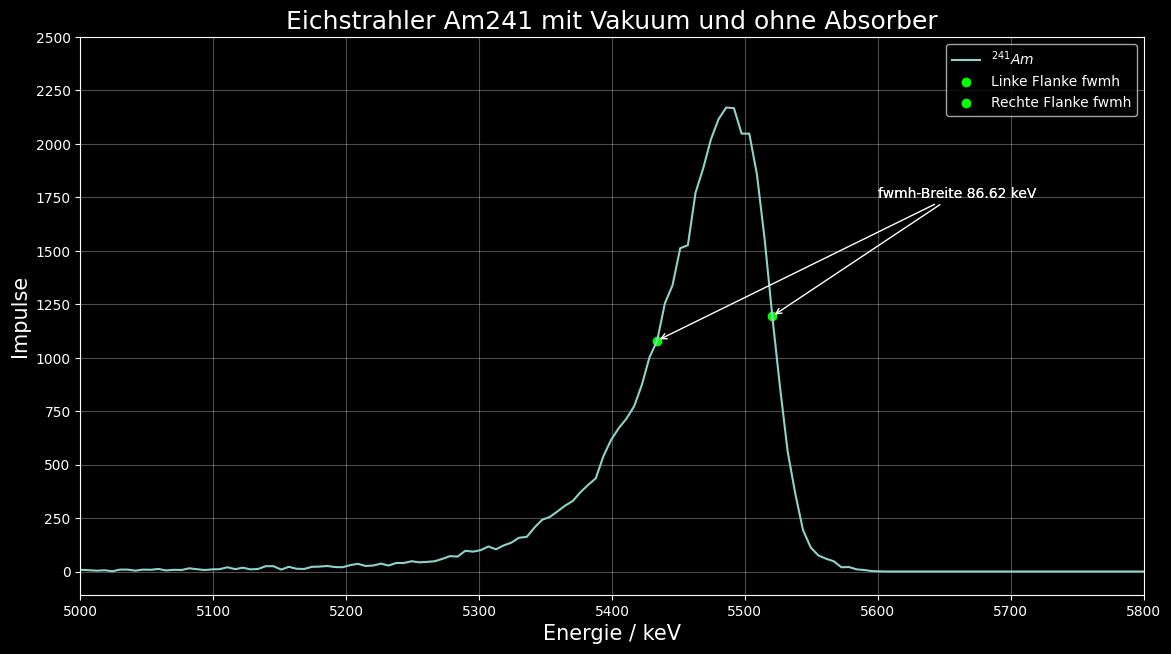

In [54]:
xarr = np.asarray(Am_w_vac_mod["Energie(keV)"])
yarr = np.asarray(Am_w_vac_mod["Impulse"])

# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size=60

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(xarr, yarr, label="$^{241}Am$")
ax.scatter(xarr[fwmh_left_idx], yarr[fwmh_left_idx], marker="o", color="#00FF00", label="Linke Flanke fwmh")
ax.scatter(xarr[fwmh_right_idx], yarr[fwmh_right_idx], marker="o", color="#00FF00", label="Rechte Flanke fwmh")

ax.set_yticks(np.arange(0, max(Am_w_vac["Impulse"])+501, 250))
ax.set_xlim(left=5000, right=5800)

annotation_text = "fwmh-Breite {} keV".format(round(fwmh, 2))
ax.annotate(annotation_text, (xarr[fwmh_right_idx], yarr[fwmh_right_idx]), (5600, 1750), arrowprops={"arrowstyle": "->"})
ax.annotate(annotation_text, (xarr[fwmh_left_idx], yarr[fwmh_left_idx]), (5600, 1750), arrowprops={"arrowstyle": "->"})

ax.set_title("Eichstrahler Am241 mit Vakuum und ohne Absorber", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()

ax.grid(axis='both', alpha=.3)

plt.tight_layout()

### Gauss-Modelfunktion

$$
\begin{equation}
	f(x) = a \cdot exp\left(-\frac{(x-x_0)^2}{2\sigma^2}\right) + c
\end{equation}
$$

In [41]:
def gauss(x, a, x0, sigma, c):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + c

In [42]:
def gauss_calib(x, sigma):
    return 2170 * np.exp(-(x-5486)**2/(2*sigma**2))

$$
\begin{equation*}
f(u - \mu; \sigma, \tau) = \frac{A}{2\tau} \cdot exp \left( \frac{u - \mu}{\tau} + \frac{\sigma^2}{2\tau^2} \right) \cdot erfc\left( \frac{1}{\sqrt{2}}\left( \frac{u - \mu}{\tau} + \frac{\sigma}{\tau} \right) \right)
\end{equation*}

### Am214 **mit** Vakuum, **ohne** Absorber, fitted

In [43]:
fitrange = np.arange(949, len(Am_w_vac_mod), 1)
xarr = Am_w_vac_mod["Energie(keV)"][fitrange]
yarr = Am_w_vac_mod["Impulse"][fitrange]
guess = 25
popt, pcov = curve_fit(gauss_calib, xarr, yarr, p0=guess)
print(*popt)

29.976621040071436


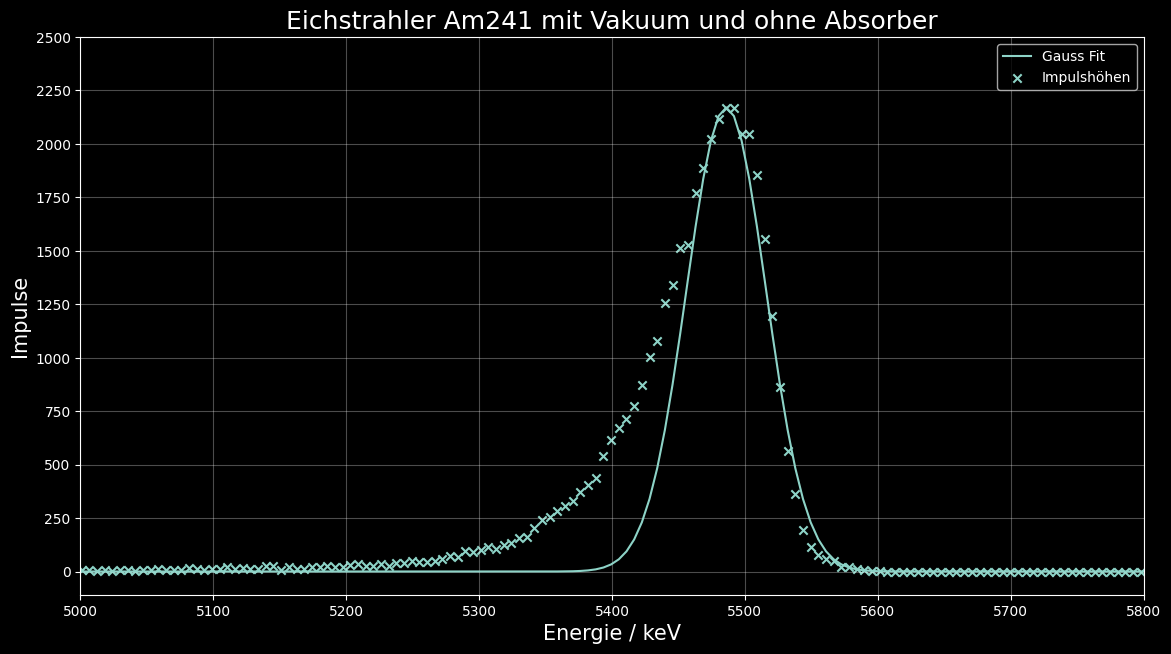

In [56]:
fitrange = np.arange(949, len(Am_w_vac_mod), 1)
xarr = Am_w_vac_mod["Energie(keV)"][fitrange]
yarr = Am_w_vac_mod["Impulse"][fitrange]
guess = 25
popt, pcov = curve_fit(gauss_calib, xarr, yarr, p0=guess)

xarr = Am_w_vac_mod["Energie(keV)"]
yarr = Am_w_vac_mod["Impulse"]

# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size=60

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.scatter(xarr, yarr, marker="x", label="Impulshöhen")
ax.plot(xarr, gauss_calib(xarr, *popt), label="Gauss Fit")
# ax.plot(np.round(fwmh_left * ecoeff), Am_w_vac_mod["Impulse"][fwmh_left], marker="o", color="#00FF00", label="Linke Flanke fwmh")
# ax.plot(np.round(fwmh_right * ecoeff), Am_w_vac_mod["Impulse"][fwmh_right], marker="o", color="#00FF00", label="Rechte Flanke fwmh")

# ax.set_xticks(np.arange(0, max(Am_w_vac["Energie(keV)"]*ecoeff)+1, 1000))
ax.set_yticks(np.arange(0, max(yarr)+501, 250))
ax.set_xlim(5000,5800)

ax.set_title("Eichstrahler Am241 mit Vakuum und ohne Absorber", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()

# ax.text(np.round(fwmh_left * ecoeff) - 400, Am_w_vac_mod["Impulse"][fwmh_left], Am_w_vac_mod["Impulse"][fwmh_left], size=0.25*size)
# ax.text(np.round(fwmh_right * ecoeff) + 100, Am_w_vac_mod["Impulse"][fwmh_right], Am_w_vac_mod["Impulse"][fwmh_right], size=0.25*size)
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

### Am241 **mit** Vakuum, **mit** Absorber, fitted

In [45]:
def fitting(frame, function, guess):
    fitrange = np.arange(frame["Impulse"].idxmax(), len(frame["Impulse"]), 1)
    xarr = frame["Energie(keV)"][fitrange]
    xarr = xarr * ecoeff
    yarr = frame["Impulse"][fitrange]
    # guess = [215, 4100,25,0]
    popt, pcov = curve_fit(function, xarr, yarr, p0=guess, maxfev=5000)
    return popt, pcov

In [46]:
popt, pcov = fitting(Am_w_vac_w_Al, gauss, [250,3100,10,0])
print(*popt)

250.0 3100.0 10.0 3.9973082099519175


C:\Users\Hunter\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [47]:
from lmfit import Model

In [48]:
gmodel = Model(gauss)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))

parameter names: ['a', 'x0', 'sigma', 'c']
independent variables: ['x']


C:\Users\Hunter\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


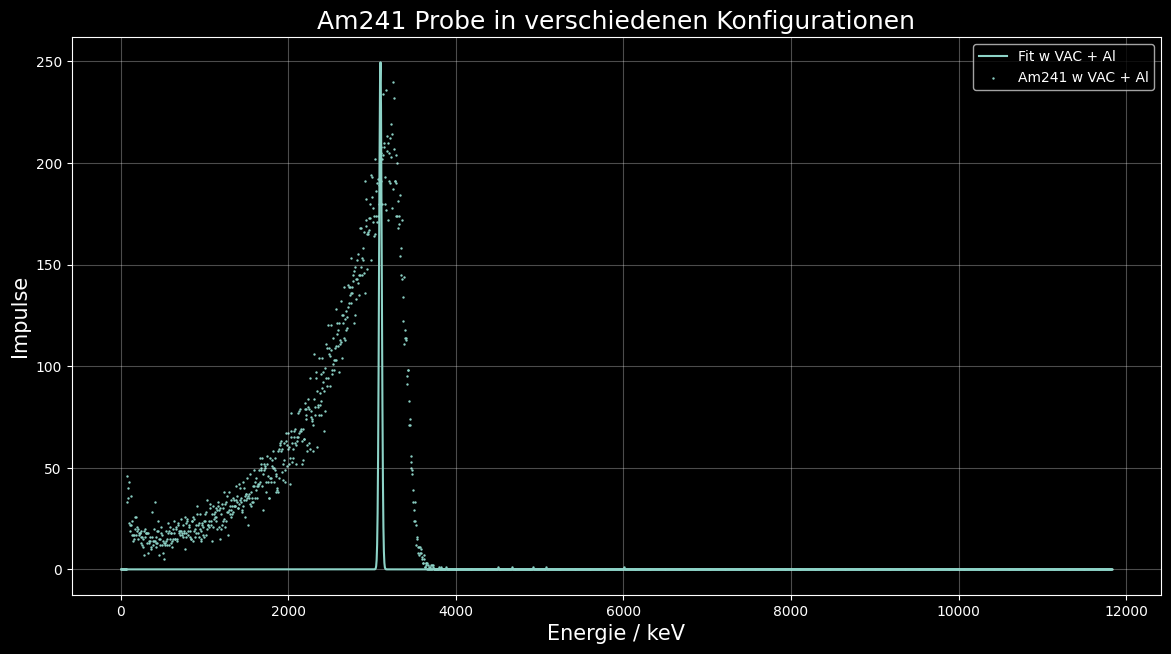

In [59]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size = 60

# fig, ax = plt.subplots(figsize=(50*cm, 20*cm))
fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.scatter(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, Am_w_vac_w_Al["Impulse"], label="Am241 w VAC + Al", s=.5)

popt, pcov = fitting(Am_w_vac_w_Al, gauss, [250,3100,16,0])
ax.plot(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, gauss(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, *popt), label="Fit w VAC + Al")

# ax.set_xticks(np.arange(0, 12000, 1000))
# ax.set_yticks(np.arange(0, 2500, 250))

ax.set_title("Am241 Probe in verschiedenen Konfigurationen", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()

ax.grid(axis='both', alpha=.3)

plt.tight_layout()

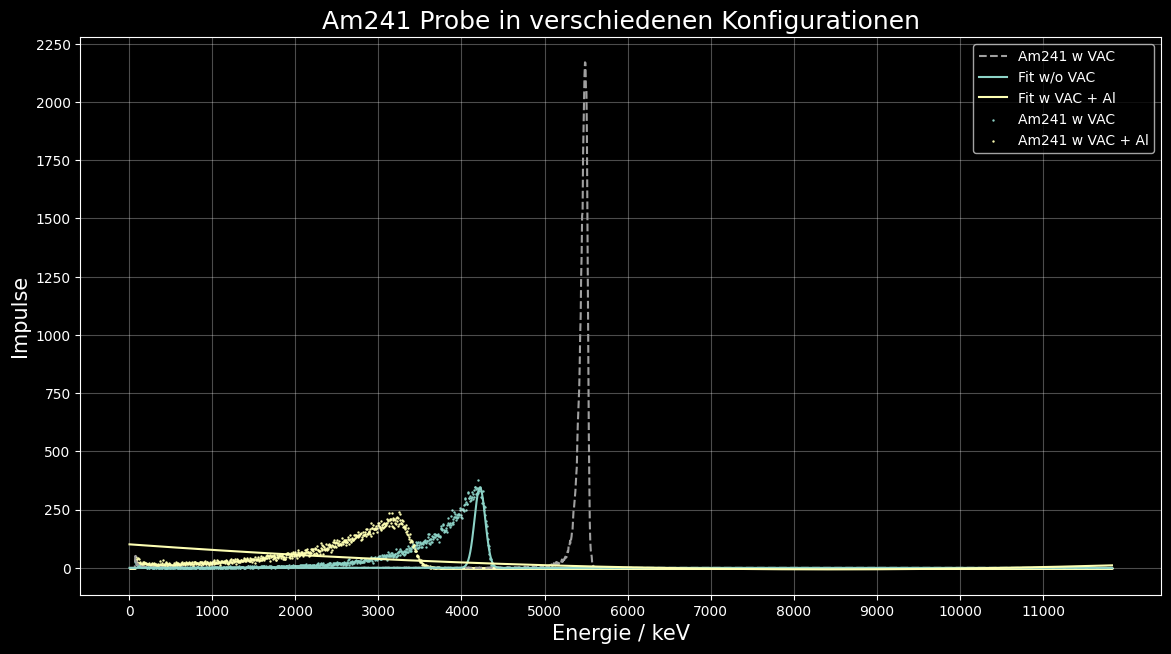

In [61]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size = 60

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(Am_w_vac_mod["Energie(keV)"], Am_w_vac_mod["Impulse"], color="#A0A0A0", linestyle="--", label="Am241 w VAC")
ax.scatter(Am_wo_vac["Energie(keV)"]*ecoeff, Am_wo_vac["Impulse"], label="Am241 w VAC", s=.5)
ax.scatter(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, Am_w_vac_w_Al["Impulse"], label="Am241 w VAC + Al", s=.5)

popt, pcov = fitting(Am_wo_vac, gauss, [215,4100,25,0])
ax.plot(Am_wo_vac["Energie(keV)"]*ecoeff, gauss(Am_wo_vac["Energie(keV)"]*ecoeff, *popt), label="Fit w/o VAC")

popt, pcov = fitting(Am_w_vac_w_Al, gauss, [215,4100,25,0])
ax.plot(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, gauss(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, *popt), label="Fit w VAC + Al")

ax.set_xticks(np.arange(0, 12000, 1000))
ax.set_yticks(np.arange(0, 2500, 250))

ax.set_title("Am241 Probe in verschiedenen Konfigurationen", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()

ax.grid(axis='both', alpha=.3)

plt.tight_layout()

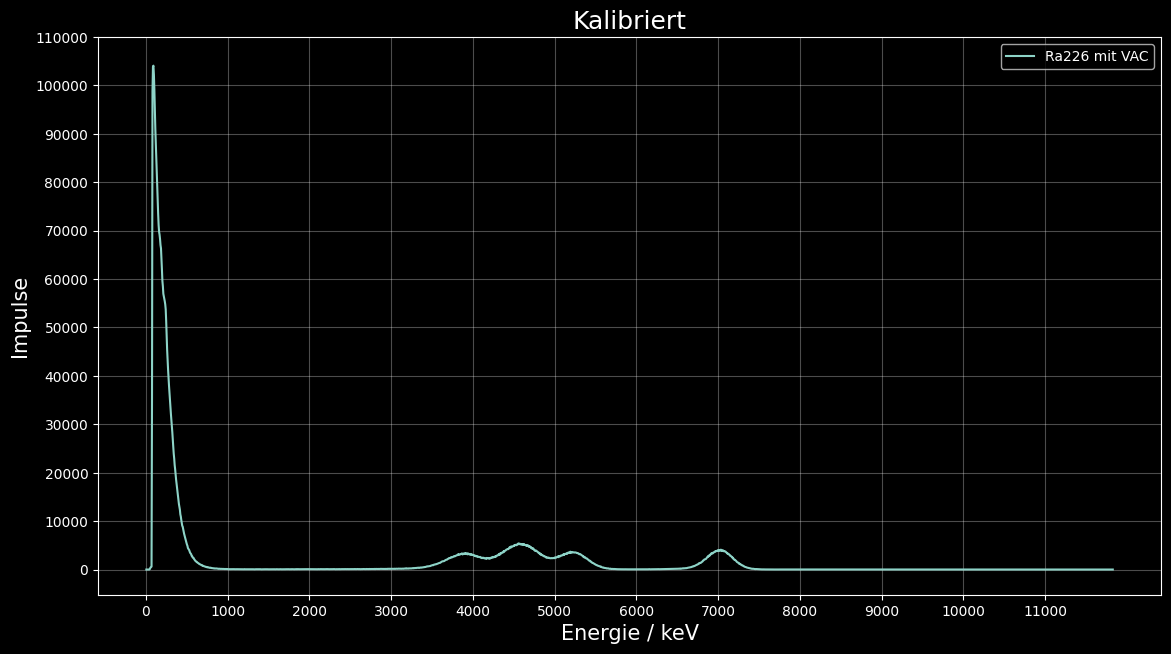

In [62]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size = 60

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

# ax.plot(Am_wo_vac["Energie(keV)"]*ecoeff, Am_wo_vac["Impulse"], label="Am241 ohne VAC")
# ax.plot(Am_w_vac_mod["Energie(keV)"], Am_w_vac_mod["Impulse"], label="Am241 mit VAC")
# ax.plot(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, Am_w_vac_w_Al["Impulse"], label="Am241 mit VAC und Abdeckung (Al)")
ax.plot(Ra_w_vac["Energie(keV)"]*ecoeff, Ra_w_vac["Impulse"], label="Ra226 mit VAC")
# ax.plot(Empty_wo_vac["Energie(keV)"]*ecoeff, Empty_wo_vac["Impulse"], label="Leermessung ohne VAC")
# ax.plot(np.round(fwmh_left * ecoeff), Am_wo_vac["Impulse"][fwmh_left], marker="o", color="#00FF00", label="Linke Flanke fwmh")
# ax.plot(np.round(fwmh_right * ecoeff), Am_wo_vac["Impulse"][fwmh_right], marker="o", color="#00FF00", label="Rechte Flanke fwmh")
# ax.axvline(x=5486, linestyle="dotted", linewidth=.7, label="$E_{\\alpha} = 5496$", color="#FF0000")
# ax.axvline(x=5443, linestyle="dotted", linewidth=.7, label="$E_{\\alpha} = 5443$", color="#FF0000")

ax.set_xticks(np.arange(0, 12000, 1000))
ax.set_yticks(np.arange(0, 120000, 10000))

ax.set_title("Kalibriert", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()

# ax.text(np.round(fwmh_left * ecoeff) - 400, Am_wo_vac["Impulse"][fwmh_left], Am_wo_vac["Impulse"][fwmh_left], size=15)
# ax.text(np.round(fwmh_right * ecoeff) + 100, Am_wo_vac["Impulse"][fwmh_right], Am_wo_vac["Impulse"][fwmh_right], size=15)
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

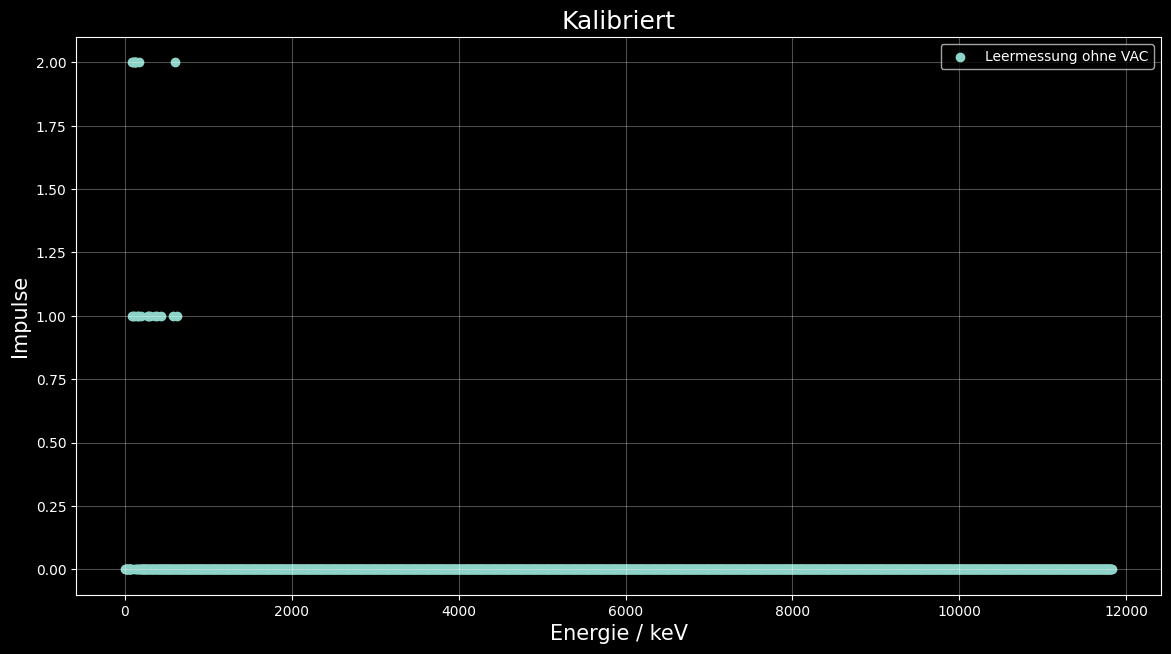

In [63]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size = 60

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.scatter(Empty_wo_vac["Energie(keV)"]*ecoeff, Empty_wo_vac["Impulse"], label="Leermessung ohne VAC")
# ax.set_xlim(0,800)

# ax.set_xticks(np.arange(0, max(Am_wo_vac["Energie(keV)"]*ecoeff)+1, 1000))
# ax.set_yticks(np.arange(0, max(Am_wo_vac["Impulse"])+1, 250))

ax.set_title("Kalibriert", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()

# ax.text(np.round(fwmh_left * ecoeff) - 400, Am_wo_vac["Impulse"][fwmh_left], Am_wo_vac["Impulse"][fwmh_left], size=15)
# ax.text(np.round(fwmh_right * ecoeff) + 100, Am_wo_vac["Impulse"][fwmh_right], Am_wo_vac["Impulse"][fwmh_right], size=15)
ax.grid(axis='both', alpha=.3)

plt.tight_layout()